In [ ]:
import pandas as pd
import numpy as np

In [ ]:
filepath = "https://raw.githubusercontent.com/inefable12/challenge5_2025/refs/heads/main/ch5_equipo_02.csv"
df = pd.read_csv(filepath)
print(df.columns)

Index(['Unnamed: 0', 'Compound_CID', 'Name', 'Synonyms', 'Molecular_Weight',
       'Molecular_Formula', 'Polar_Area', 'Complexity', 'XLogP',
       'Heavy_Atom_Count', 'H-Bond_Donor_Count', 'H-Bond_Acceptor_Count',
       'Rotatable_Bond_Count', 'InChI', 'SMILES', 'InChIKey', 'IUPAC_Name',
       'Exact_Mass', 'Monoisotopic_Mass', 'Charge', 'Covalent_Unit_Count',
       'Isotopic_Atom_Count', 'Total_Atom_Stereo_Count',
       'Defined_Atom_Stereo_Count', 'Undefined_Atom_Stereo_Count',
       'Total_Bond_Stereo_Count', 'Defined_Bond_Stereo_Count',
       'Undefined_Bond_Stereo_Count', 'Linked_PubChem_Literature_Count',
       'Linked_PubChem_Patent_Count', 'Linked_PubChem_Patent_Family_Count',
       'MeSH_Headings', 'Annotation_Content', 'Annotation_Type_Count',
       'Linked_BioAssays', 'Create_Date', 'Data_Source',
       'Data_Source_Category', 'Tagged_by_PubChem'],
      dtype='object')


De la lista de las columnas presentadas en las tablas, se pueden observar que hay descriptores que no aportarían para el análisis de la data, sino son solo para identificación o información extra, tales como Compound_CID, Name, Synonyms, InChI, SMILES, InChIKey, IUPAC_Name, Linked_PubChem_Literature_Count, Linked_PubChem_Patent_Count, Linked_PubChem_Patent_Family_Count, MeSH_Headings, Annotation_Content, Annotation_Type_Count, Tagged_by_PubChem, Create_Date, Data_Source, Data_Source_Category. Por lo tanto, todas estas columnas se desechan para el análisis, y se toma en cuenta la columna principal de **SMILES**.

In [ ]:
df.head()

,Unnamed: 0,Compound_CID,Name,Synonyms,Molecular_Weight,Molecular_Formula,Polar_Area,Complexity,XLogP,Heavy_Atom_Count,...,Linked_PubChem_Patent_Count,Linked_PubChem_Patent_Family_Count,MeSH_Headings,Annotation_Content,Annotation_Type_Count,Linked_BioAssays,Create_Date,Data_Source,Data_Source_Category,Tagged_by_PubChem
0,0,71468161,Bisthianostat,Bisthianostat|CFH367C|CFH367 C|CFH367-C|CF367|...,366.50,C15H18N4O3S2,161.0,464.0,1.3,24,...,9,2,NaN,Biological Test Results|Classification|Drug an...,8,1156054|1156056|1156058|1156060|1156061|115606...,20130610,BindingDB|ChEMBL|Google Patents|IBM|MolGenie|P...,Chemical Vendors|Curation Efforts|Governmental...,NaN
1,1,24881464,"Triazole Ligand, 12c","Triazole Ligand, 12c|CHEMBL487742|BDBM24355|N-...",407.50,C22H25N5O3,109.0,533.0,2.7,30,...,1,1,NaN,Biological Test Results|Interactions and Pathw...,7,404443|404444|404445|404448|404449|404450|4044...,20080902,BindingDB|ChEMBL|DiscoveryGate|Google Patents|...,Curation Efforts|Journal Publishers|Legacy Dep...,NaN
2,2,4201,Minoxidil,minoxidil|38304-91-5|Minoximen|Regaine|Theroxi...,209.25,C9H15N5O,88.9,329.0,1.2,15,...,25552,7899,Minoxidil,Biological Test Results|Interactions and Pathw...,15,357|361|364|368|371|373|374|375|410|411|422|42...,20050325,"10X CHEM|3WAY PHARM INC|A&J Pharmtech CO., LTD...",Chemical Vendors|Curation Efforts|Governmental...,C - Cardiovascular system > C02 - Antihyperten...
3,3,11749858,Abexinostat,ABEXINOSTAT|783355-60-2|PCI 24781|CRA 024781|A...,397.40,C21H23N3O5,104.0,550.0,2.2,29,...,5985,1054,NaN,Biological Test Results|Interactions and Pathw...,12,1|3|5|7|9|13|15|19|21|23|25|29|31|33|35|37|39|...,20061026,001Chemical|10X CHEM|A2B Chem|A2Z Chemical|AA ...,Chemical Vendors|Curation Efforts|Governmental...,C274 - Antineoplastic Agent > C163758 - Target...
4,4,10314237,8-(biphenyl-4-yl)-N-hydroxy-8-oxooctanamide,CHEMBL95313|8-(biphenyl-4-yl)-N-hydroxy-8-oxoo...,325.40,C20H23NO3,66.4,382.0,4.1,24,...,12,5,NaN,Biological Test Results|Interactions and Pathw...,7,8297|58061|78420|80247|83150|90662|90668|10335...,20061025,BindingDB|ChEMBL|ChemSpider|DiscoveryGate|Goog...,Curation Efforts|Governmental Organizations|Jo...,NaN


**SMILES** son códigos que describen moléculas. Estas se convierten a números usando **descriptores** moleculares para un correcto análisis.

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors

Convertimos los SMILES en moléculas con la librería **rdkit** y su función *Chem.MolFromSmiles()*

In [ ]:
df["mol"] = df["SMILES"].apply(Chem.MolFromSmiles)

In [ ]:
df['mol'].isnull().sum() #no hay errores o moléculas invalidas

np.int64(0)

Empleamos la siguiente lista de descriptores como base para analizar sin mayor tecnisismo al dataset.

En este caso, las columnas que contienen valores numéricos en los descriptores moleculares se utilizan para describir cuantitativamente la información física y química de las moléculas, tal es el caso de *MolLogP* que es una representación cuantitativa de la hidrofobiciad de las moléculas que influye en la solubilidad y permeabilidad de un fármaco, también el Peso Molecular *MolWt* que afecta absorción, *TPSA* que es el área superficial polar relacionada con capacidad de formar enlaces de hidrógenos, *NumRotatableBonds* que implica la medida de flexibilidad estructural, *NumHDonors* que es la cantidad de donadores de puentes de hidrógeno, y *NumHAcceptors* siendo el número de aceptores de puentes de hidrógeno. [1][2]

In [ ]:
descriptors = {
    'MolWt': Descriptors.MolWt,
    'MolLogP': Descriptors.MolLogP,
    'TPSA': Descriptors.TPSA,
    'NumRotatableBonds': Descriptors.NumRotatableBonds,
    'NumHDonors': Descriptors.NumHDonors,
    'NumHAcceptors': Descriptors.NumHAcceptors
}

Luego, se aplican los descriptores a cada molécula. Y se visualiza este conjunto de columnas nuevas del dataframe.

In [ ]:
for name, func in descriptors.items():
    df[name] = df["mol"].apply(func)

df[ list(descriptors.keys()) ].head()

,MolWt,MolLogP,TPSA,NumRotatableBonds,NumHDonors,NumHAcceptors
0,366.468,2.54950,104.21,8,3,7
1,407.474,3.71880,109.14,10,3,6
2,209.253,0.17237,91.16,1,3,6
3,397.431,2.42220,104.04,8,3,6
4,325.408,4.38230,66.40,9,2,3


Así, se crea un nuevo dataframe de columnas con los descriptores numéricos para el clustering.

In [ ]:
X = df[list(descriptors.keys())]
df_Descriptors = pd.DataFrame(X, columns=descriptors.keys())
#df_Descriptors.head()

Realizamos un **escalado** de descriptores para que no haya tanta diferencia entre rangos como se pudo observar en el dataframe anterior.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_Descriptors)
X_scaled = pd.DataFrame(X_scaled, columns=df_Descriptors.columns)
X_scaled.head()

,MolWt,MolLogP,TPSA,NumRotatableBonds,NumHDonors,NumHAcceptors
0,-0.005794,0.010914,0.218267,0.494374,0.281868,0.763569
1,0.257596,0.595002,0.321398,0.957556,0.281868,0.397107
2,-1.015620,-1.176510,-0.054726,-1.126765,0.281868,0.397107
3,0.193088,-0.052675,0.214711,0.494374,0.281868,0.397107
4,-0.269531,0.926434,-0.572680,0.725965,-0.358537,-0.702277


# PCA (Reducción de dimensionalidad)

Se plotea la varianza acumulada por PCA para determinar la cantidad de dimensiones o componentes requeridos para preservar el 95% de varianza.

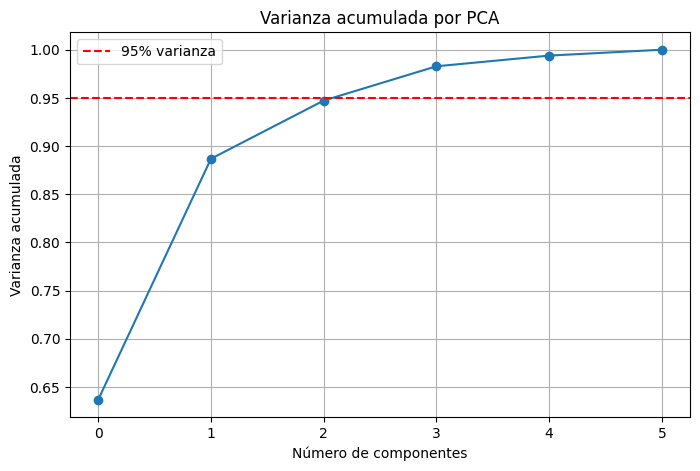

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_withPCA = pca.fit_transform(X_scaled)

#Varianza acumulada
explained_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(explained_var, marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza acumulada por PCA')
plt.grid()
plt.axhline(0.95, color='r', linestyle='--', label='95% varianza')
plt.legend()
plt.show()

En este caso, se interpreta que con **4 componentes** se preserva el 95% de varianza.

In [ ]:
n_components_95 = np.argmax(explained_var >= 0.95) + 1
print(f"Se requieren {n_components_95} componentes para preservar al menos el 95% de la varianza.")

Se requieren 4 componentes para preservar al menos el 95% de la varianza.


# KMeans


En un inicio, aplicamos un **PCA** típico de 2 componentes para visualización. Luego se emplea *elbow method* viendo como disminuye la variable '**inertia**', y así obtener el **mejor número de clusters** para aplicarlo.

In [ ]:
from sklearn.decomposition import PCA

pca_2comp = PCA(n_components=2)
X_pca2 = pca_2comp.fit_transform(X_scaled)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Creamos lista vacía para poder llenarla con el for
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

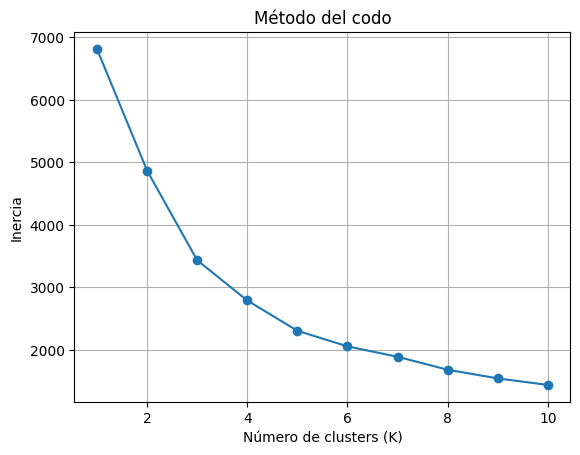

In [ ]:
#Grafico elbow
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.grid(True)
plt.show()

Se aprecia una caída significativa de la inercia entre un **K=3**

In [ ]:
k = 3  #Número óptimo
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_kmeans = kmeans.fit_predict(X_scaled) #donde labels representa a qué grupo pertenece cada molécula
labels_kmeans

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

Luego visualizamos estos clusters con PCA=2 dimensiones para saber cómo se agrupó

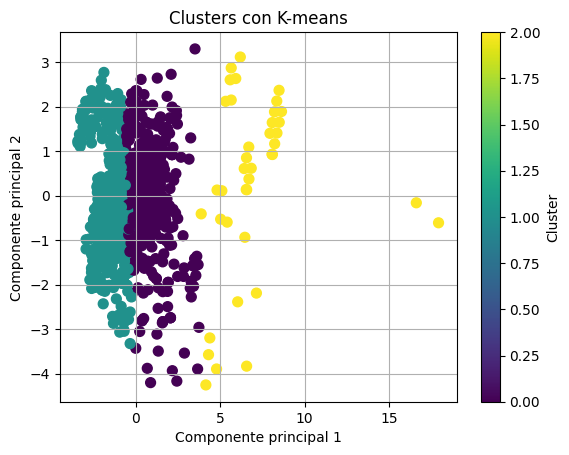

In [ ]:
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels_kmeans, cmap='viridis', s=50)
plt.title("Clusters con K-means")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

Para confirmar la idea y evaluar la calidad de agrupamiento, probamos visualizando la gráfica de *Silhouette Score*

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

score = silhouette_score(X_scaled, labels_kmeans)
print(f"Silhouette Score para k={k}: {score:.3f}")

Silhouette Score para k=3: 0.314


Gráfica de Silhouette

Silhouette Score promedio para k=3: 0.382


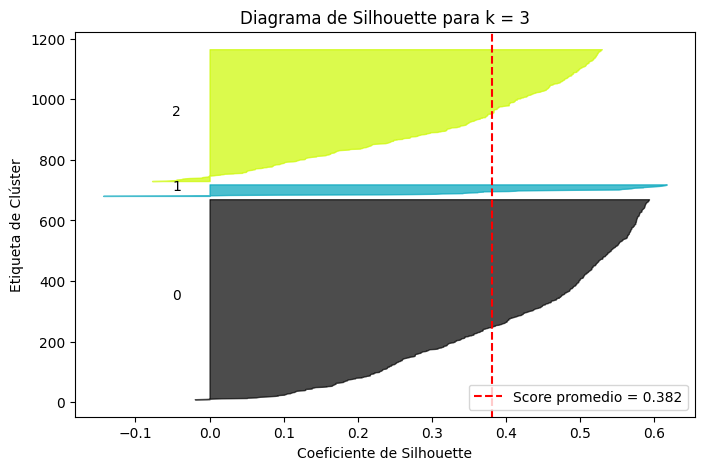

In [ ]:
import matplotlib.cm as cm

kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca2)

#Calcula la puntuación de silhouette por muestra
silhouette_vals = silhouette_samples(X_pca2, cluster_labels)

#Calcula el silhouette promedio
silhouette_avg = silhouette_score(X_pca2, cluster_labels)
print(f"Silhouette Score promedio para k={k}: {silhouette_avg:.3f}")

fig, ax = plt.subplots(figsize=(8, 5))
y_lower = 10

for i in range(k):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # espacio entre clusters

ax.set_title(f"Diagrama de Silhouette para k = {k}")
ax.set_xlabel("Coeficiente de Silhouette")
ax.set_ylabel("Etiqueta de Clúster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Score promedio = {silhouette_avg:.3f}")
ax.legend()
plt.show()

Aunque elbow y silhouette no coincidan en su totalidad, **K=3** tiene un silhouette score ligeramente más alto (0.383), por lo que se considera.

# DBSCAN

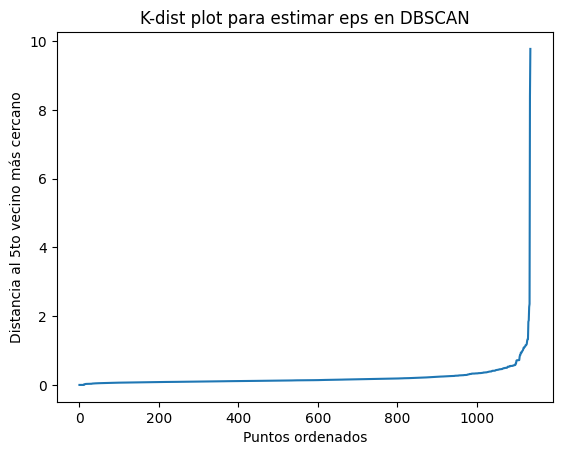

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Estimar eps óptimo con gráfica k-dist
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_withPCA[:, :2])
distances, indices = neighbors_fit.kneighbors(X_withPCA[:, :2])
distances = sorted(distances[:, 4])
plt.plot(distances)
plt.title("K-dist plot para estimar eps en DBSCAN")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 5to vecino más cercano")
plt.show()



In [ ]:
# Luego aplicar DBSCAN con el eps estimado
dbscan = DBSCAN(eps=1, min_samples=5)  # prueba con eps ajustado
labels = dbscan.fit_predict(X_scaled)
df_labels = pd.DataFrame(labels, columns=['cluster'])
pd.unique(df_labels["cluster"])

array([ 0,  4, -1,  1,  2,  3])

Aqui, creamos y entrenamos nuesto DBScan para trabajar con un vaor de Epsilon de 1 y verificando un minimo de samples en esa área de 5. Valores que indican ser los más adecuados en relación a nuestro anterior análisis. Para poder tener una mejor visualización de la agrupación que se dio, lo plotearemos en 3D.

In [ ]:
pca_3comp = PCA(n_components=3)
X_pca2 = pca_3comp.fit_transform(X_scaled)

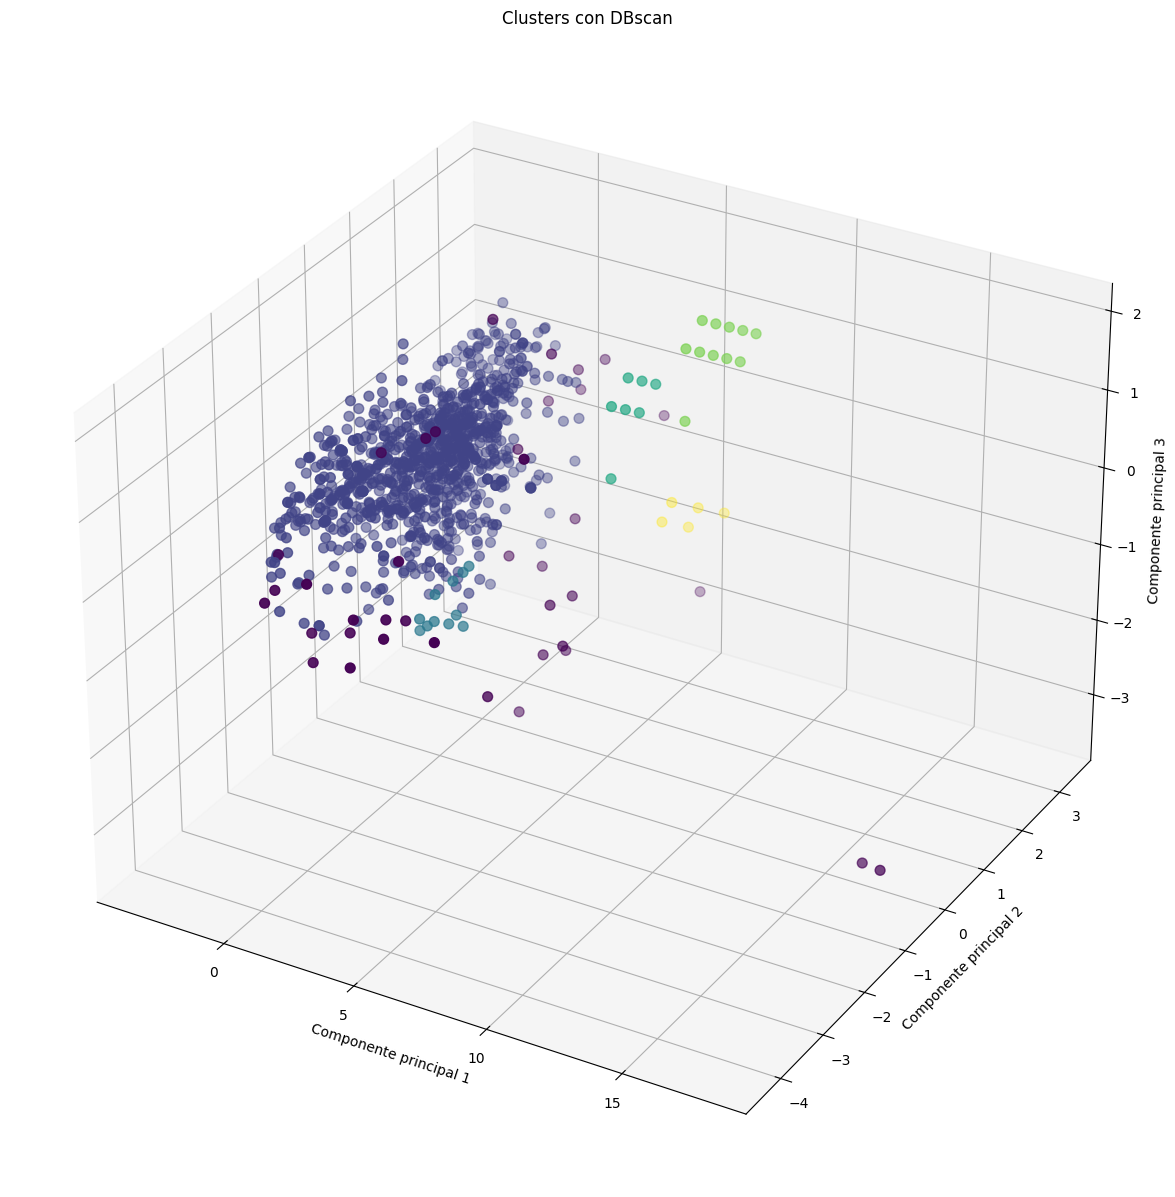

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_pca2[:, 0], X_pca2[:, 1], X_pca2[:, 2], c=labels, cmap='viridis', s=50)
ax.set_title("Clusters con DBscan")
ax.set_xlabel("Componente principal 1")
ax.set_ylabel("Componente principal 2")
ax.set_zlabel("Componente principal 3")
ax.grid(True)
plt.show()

Bibliografía:

[1] https://sciencedirect.pucp.elogim.com/science/article/pii/S0009250925002015

[2] https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors